<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Obtaining_the_Efficient_Frontier_Yahoo_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtaining the Efficient Frontier

In [1]:
pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

tickers_list = ['MSFT', 'AAPL']

# Fetch the data
import yfinance as yf
sec_data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(sec_data.head())

[*********************100%%**********************]  2 of 2 completed
                 AAPL       MSFT
Date                            
2015-01-02  24.466452  40.452736
2015-01-05  23.777195  40.080742
2015-01-06  23.779430  39.492466
2015-01-07  24.112867  39.994236
2015-01-08  25.039335  41.170788


In [4]:
print(sec_data.tail())

                  AAPL        MSFT
Date                              
2023-12-05  193.419998  372.519989
2023-12-06  192.320007  368.799988
2023-12-07  194.270004  370.950012
2023-12-08  195.710007  374.230011
2023-12-11  191.830002  368.105011


Do a quick check of the data, normalize it to 100, and see how the 2 stocks were doing during the given timeframe.

<Axes: xlabel='Date'>

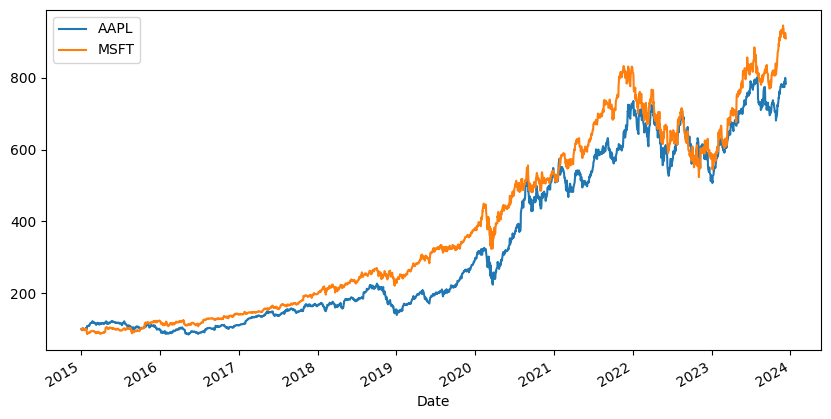

In [5]:
(sec_data / sec_data.iloc[0] * 100).plot(figsize=(10, 5))

Calculate their logarithmic returns.

In [6]:
log_returns = np.log(sec_data / sec_data.shift(1))

Create a variable that carries the number of assets in your portfolio.

In [12]:
num_assets = len(tickers_list)
num_assets

2

The portfolio need not be equally weighted. So, create a variable, called “weights”. Let it contain as many randomly generated values as there are assets in your portfolio. Don’t forget these values should be neither smaller than 0 nor equal or greater than 1! <br />

*Hint: There is a specific NumPy function that allows you to generate such values. It is the one we used in the lecture - NumPy.random.random().*

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.52109893, 0.47890107])

Sum the obtained values to obtain 1 – summing up the weights to 100%!

In [15]:
weights[0] + weights[1]

0.9999999999999999

In [16]:
#Now, estimate the expected Portfolio Return, Variance, and Volatility.
#Expected Portfolio Return:
np.sum(weights * log_returns.mean()) * 250

0.23673645983303904

In [17]:
#Expected Portfolio Variance:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.06863635542458932

In [18]:
#Expected Portfolio Volatility:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.26198541070943115

In [19]:
#1) Create two empty lists. Name them pf_returns and pf_volatilites.
pfolio_returns = []
pfolio_volatilities = []

In [ ]:
#2) Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [20]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.23265721610783122,
  0.23389806455325057,
  0.2364420620790773,
  0.24177256858969043,
  0.2381957655672626,
  0.23786345370970338,
  0.238333204398835,
  0.2381988927557861,
  0.2362123049912687,
  0.239600907704222,
  0.2367849203128754,
  0.240011548208878,
  0.24351865698805597,
  0.2313897752993733,
  0.24308004351180643,
  0.23400833023410575,
  0.24030626150214915,
  0.2405841036774868,
  0.2367057083463311,
  0.23601711928753774,
  0.23598402741958152,
  0.23721485109122248,
  0.24095915044076036,
  0.23818036359699635,
  0.23584992625202922,
  0.238412705694201,
  0.23256218634966505,
  0.23501528718621403,
  0.2407279447595656,
  0.23674278208846816,
  0.23067747815319675,
  0.24082294922782765,
  0.2388185432196518,
  0.2431208004131788,
  0.23867486502655713,
  0.23983101005888582,
  0.23533065257935765,
  0.23411182863438523,
  0.23791701057219886,
  0.23142745234191306,
  0.23666096373272794,
  0.2317948786260216,
  0.23336827087045364,
  0.2415559647627567,
  0.23545

In [21]:
#3) Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays.

In [22]:
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.23265722, 0.23389806, 0.23644206, 0.24177257, 0.23819577,
        0.23786345, 0.2383332 , 0.23819889, 0.2362123 , 0.23960091,
        0.23678492, 0.24001155, 0.24351866, 0.23138978, 0.24308004,
        0.23400833, 0.24030626, 0.2405841 , 0.23670571, 0.23601712,
        0.23598403, 0.23721485, 0.24095915, 0.23818036, 0.23584993,
        0.23841271, 0.23256219, 0.23501529, 0.24072794, 0.23674278,
        0.23067748, 0.24082295, 0.23881854, 0.2431208 , 0.23867487,
        0.23983101, 0.23533065, 0.23411183, 0.23791701, 0.23142745,
        0.23666096, 0.23179488, 0.23336827, 0.24155596, 0.23545375,
        0.23600051, 0.23930132, 0.23594631, 0.24093621, 0.23717134,
        0.22886207, 0.23853861, 0.23420175, 0.24142903, 0.23063047,
        0.23139774, 0.23860761, 0.22949795, 0.23266487, 0.23535231,
        0.24463326, 0.23209529, 0.23074617, 0.24012365, 0.23537265,
        0.23144591, 0.24324709, 0.23271232, 0.23610236, 0.23864071,
        0.23932152, 0.24012161, 0.2330618 , 0.23

In [24]:
#Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities.
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [25]:
portfolios.head()

,Return,Volatility
0,0.232657,0.271736
1,0.233898,0.267641
2,0.236442,0.262324
3,0.241773,0.265262
4,0.238196,0.261170


Text(0, 0.5, 'Expected Return')

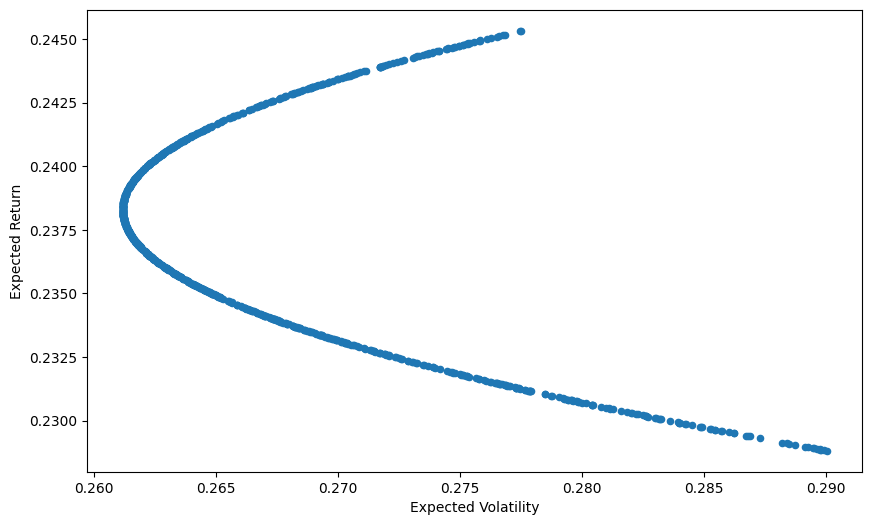

In [26]:
#Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return.
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')